# SARABANDE Parallelization Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("light_mode")

In [10]:
# pip install -e ~/Desktop/Research/package_testing/sarabande


SyntaxError: invalid syntax (1310880146.py, line 3)

In [11]:
pip install sarabande

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sarabande

# sarabande.calc_zeta

In [3]:
def compute_components(measure_obj):
    dt_components = []
    t0 = time.process_time()
    sarabande.create_XYZR(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.create_radial_bins(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.calc_ft_data(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.calc_and_save_YLMs(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.bin_spherical_harmonics(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.calc_a_lm_coeffs(measure_obj, verbose=False, kernel_name = measure_obj.save_name)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.calc_zeta(measure_obj, skip_prepare=True)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    percents = list(np.array(dt_components) / sum(dt_components) * 100)

    percents = [(sum(percents[:4]))] + percents[4:]
    
    return percents


def compute_components_projected(measure_obj):
    dt_components = []
    t0 = time.process_time()
    sarabande.projected_create_bins(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.projected_create_kernels(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.calc_ft_data(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.projected_create_Cm_coeffs(measure_obj)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    t0 = time.process_time()
    sarabande.calc_zeta(measure_obj, skip_prepare=True)
    dt = time.process_time() - t0
    dt_components.append(dt)
    
    percents = list(np.array(dt_components) / sum(dt_components) * 100)

    percents = [(sum(percents[:2]))] + percents[2:]
    
    return percents

    
    
    

In [5]:
#Preamble
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os
import time

In [6]:
hdulist = pyf.open('../data/dens_t800.fits.gz')
data = hdulist[0].data.astype(np.float64)
data -= np.mean(data)

data_32 = data[:32,:32,:32]
data_64 = data[:64,:64,:64] 
data_128 = data[:128,:128,:128]
data_256 = data

data_list = [data_32, data_64, data_128, data_256]

In [7]:
save_dir = os.getcwd() + '/output/'

# _3PCF = sarabande.measure(nPCF=3, projected=False, density_field_data = data_128, save_dir=save_dir, save_name='example', nbins=5, ell_max=2)
# percents_3pcf = compute_components(_3PCF)



In [8]:
_4PCF = sarabande.measure(nPCF=4, projected=False, density_field_data = data_128, save_dir=save_dir, save_name='example', nbins=5, ell_max=2)
percents_4pcf = compute_components(_4PCF)

ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 2
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
Executing 4PCF Calculation ...


Process SpawnProcess-2:
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/Users/jamessunseri/anaconda3/envs/astrods/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/jamessunseri/anaconda3/envs/astrods/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jamessunseri/anaconda3/envs/astrods/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Users/jamessunseri/anaconda3/envs/astrods/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'load_almb' on <module 'sarabande.calc_PCF' from '/Users/jamessunseri/Desktop/Research/package_testing/sarabande/sarabande/calc_PCF.py'>
Process SpawnProcess-6:
Process SpawnProcess-4:
Traceback (most recent call last):
  File "/Users/jamessunseri/anaconda3/envs/astrods/lib

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [ ]:
_3PCF_p = sarabande.measure(nPCF=3, projected=True, density_field_data = data_128[:,:,16], save_dir=save_dir, save_name='example', nbins=20, m_max=5)
percents_3pcf_p = compute_components_projected(_3PCF_p)

_4PCF_p = sarabande.measure(nPCF=4, projected=True, density_field_data = data_128[:,:,16], save_dir=save_dir, save_name='example', nbins=20, m_max=5)
percents_4pcf_p = compute_components_projected(_4PCF_p)



In [4]:
import pandas as pd

In [30]:
percents_dict = {'3PCF': percents_3pcf, '4PCF': percents_4pcf,'Proj. 3PCF': percents_3pcf_p,'Proj. 4PCF': percents_4pcf_p}
percents_df = pd.DataFrame(percents_dict)
# percents_df.to_csv("percents.csv")

In [5]:
# percents = np.array(dt_components_3pcf) / sum(dt_components_3pcf) * 100
explode = [0.05,0.02,0.02,0.02]
labels_full= ['Initialize Data & Save $Y_{\ell m}$', 'Create Harmonic Kernels', 'Calculate $a_{\ell m}$ Coefficients', 'Combine Coefficients']
labels_proj = ['Initialize Data & FT', 'Create Kernels', 'Calculate $c_m$ Coefficients', 'Combine Coefficients']

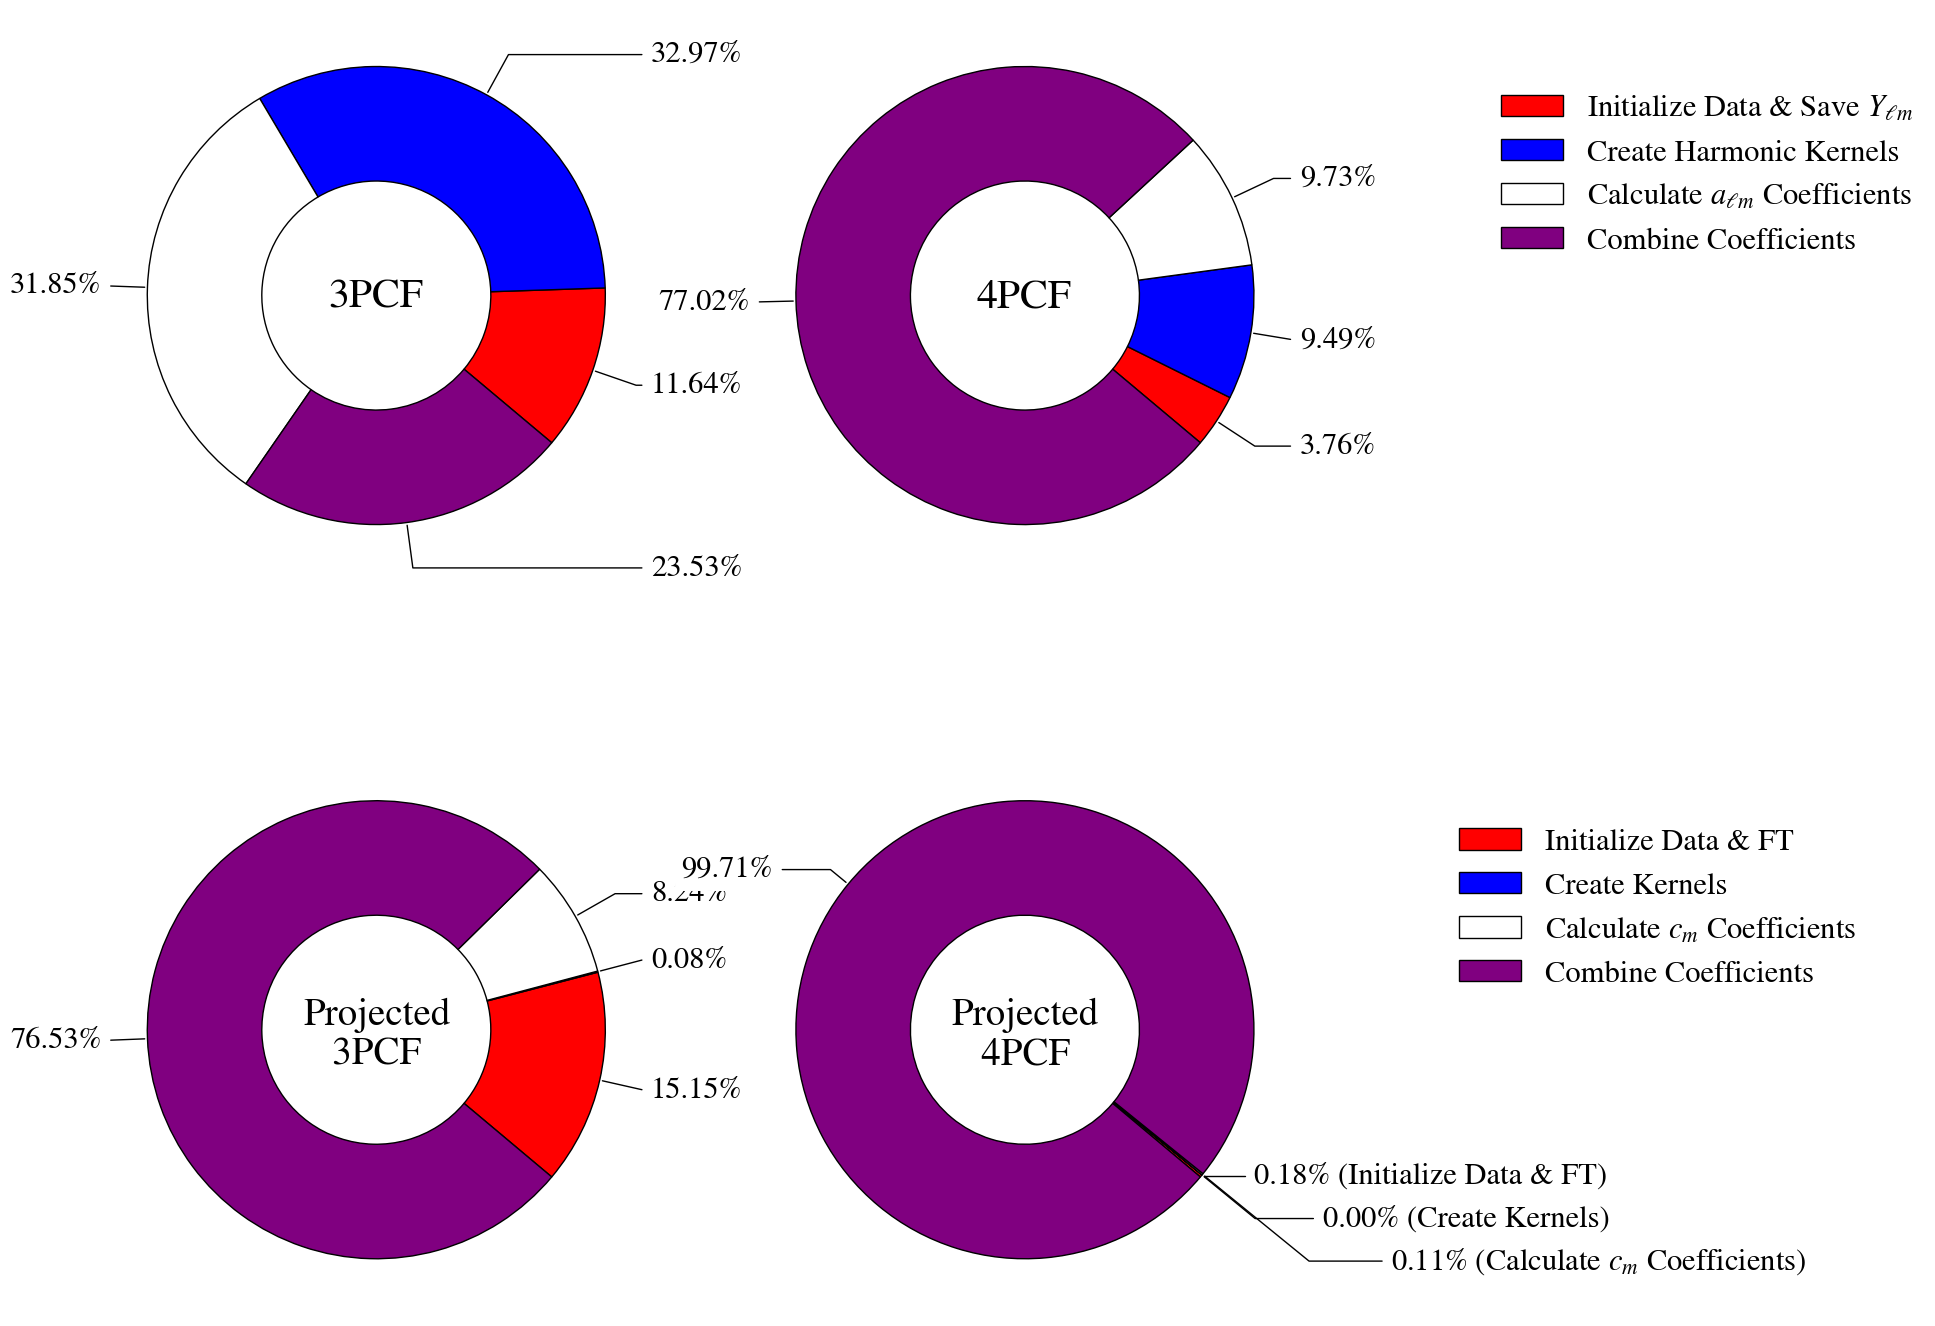

In [13]:
fig, ax = plt.subplots(2,2, figsize=(18, 15), subplot_kw=dict(aspect="equal"))

outer_colors = ['red', 'blue', 'white', 'purple']

# fig.suptitle("Computation Cost of SARABANDE")
###########################
#      Top Left
###########################
wedges, texts = ax[0,0].pie(percents_3pcf,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[0,0].annotate("{0:0.2f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[0,0].annotate("{0:0.2f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[0,0].annotate("{0:0.2f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[0,0].annotate("{0:0.2f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        

ax[0].text(-0.21,-0.05, "3PCF", fontsize=30)


###########################
#      Top Right
###########################
wedges, texts = ax[0,1].pie(percents_4pcf,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[0,1].annotate("{0:0.2f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[0,1].annotate("{0:0.2f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[0,1].annotate("{0:0.2f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[0,1].annotate("{0:0.2f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        

ax[0,1].text(-0.21,-0.05, "4PCF", fontsize=30)

ax[0,1].legend(wedges, labels_full , frameon=False, bbox_to_anchor=(1.6, 0.4, 0.5, 0.5))


###########################
#      Bottom Left
###########################
wedges, texts = ax[1,0].pie(percents_3pcf_p,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[1,0].annotate("{0:0.2f}%".format(percents_3pcf_p[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[1,0].annotate("{0:0.2f}%".format(percents_3pcf_p[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[1,0].annotate("{0:0.2f}%".format(percents_3pcf_p[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[1,0].annotate("{0:0.2f}%".format(percents_3pcf_p[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        

ax[1,0].text(-0.32,-0.15, "Projected\n   3PCF", fontsize=28)

###########################
#      Bottom Right
###########################
wedges, texts = ax[1,1].pie(percents_4pcf_p,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[1,1].annotate("{0:0.2f}% ({1})".format(percents_4pcf_p[i], labels_proj[i]), xy=(x, y), xytext=(1.0*np.sign(x), 1.0*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[1,1].annotate("{0:0.2f}% ({1})".format(percents_4pcf_p[i], labels_proj[i]), xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[1,1].annotate("{0:0.2f}% ({1})".format(percents_4pcf_p[i], labels_proj[i]), xy=(x, y), xytext=(1.6*np.sign(x), 1.6*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[1,1].annotate("{0:0.2f}%".format(percents_4pcf_p[i]), xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                    horizontalalignment=horizontalalignment, **kw)
        

ax[1,1].text(-0.32,-0.15, "Projected\n   4PCF", fontsize=28)

ax[1,1].legend(wedges, labels_proj , frameon=False, bbox_to_anchor=(1.5, 0.4, 0.5, 0.5))
fig.tight_layout()
fig.savefig("big_pie_chart_final_non_parallelized.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
percents_df_parallel = pd.read_csv("percents.csv")

percents_df_parallel

percents_df = pd.read_csv("percents_non_parallelized.csv")

percents_4pcf = percents_df_parallel['4PCF']
percents_3pcf = percents_df['4PCF']

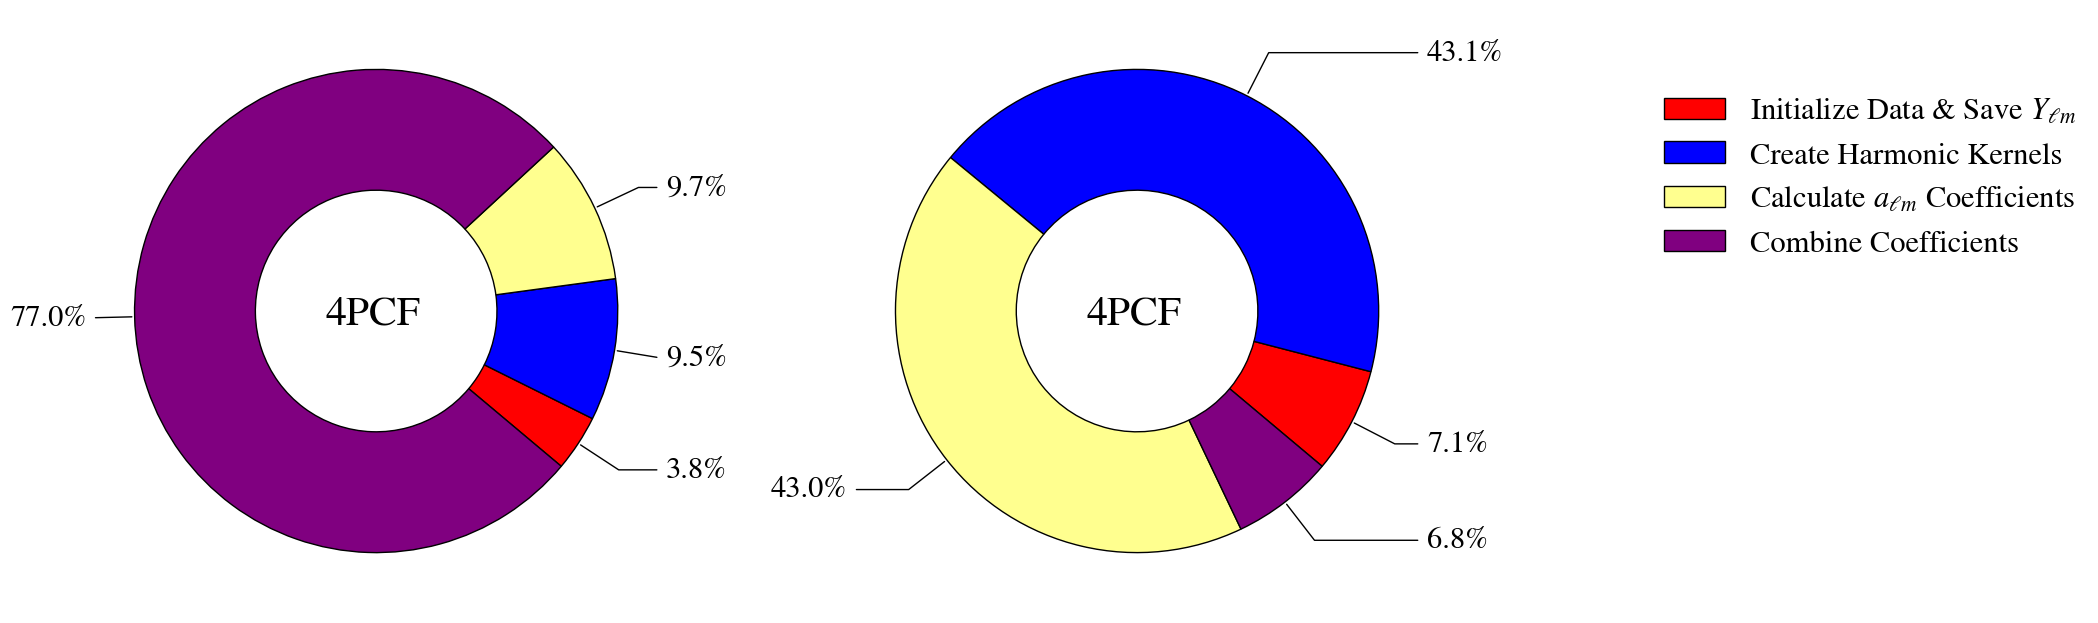

In [15]:
fig, ax = plt.subplots(1,2, figsize=(18, 8), subplot_kw=dict(aspect="equal"))

outer_colors = ['red', 'blue', '#FFFF8F', 'purple']


wedges, texts = ax[0].pie(percents_3pcf,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
# ax[0].set_title("Not Parallelized", fontsize=50)
ax[0].text(-0.21,-0.05, "4PCF", fontsize=30)


###########################
#      Top Right
###########################
wedges, texts = ax[1].pie(percents_4pcf,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        

ax[1].text(-0.21,-0.05, "4PCF", fontsize=30)
# ax[1].set_title("Parallelized", fontsize=50)
ax[1].legend(wedges, labels_full , frameon=False, bbox_to_anchor=(1.6, 0.4, 0.5, 0.5))

# plt.savefig("Nonparallelized_fig.pdf", dpi=300)
# fig.tight_layout()
# fig.savefig("compare_parallelization.pdf", dpi=300, bbox_inches="tight")
